# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [15]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [16]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price =  np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- `'RM'`: It is natural to think that more rooms increase the price of a house, just because the house's cost to build it increase with the number of rooms. So, an increase of RM should lead to an increase in the value of MDEV. 

- `'LSTAT'`: Considering LSTAT as a percentage of lower social status population, if LSTAT increases, it will cause a decrease in the houses price in the neighborhood. That is, in general, rich people lives in expensive houses in rich neighborhoods, poor people lives in cheap houses in poor neighborhoods. 

- `'PTRADIO'`: If I have to choose a neighborhood, it will be one with good schools for my kids. In good schools, teachers are assigned a small number of students to give them a better education. One could expect that houses near good schools (which implies low PTRATIO) have a bigger demand, which rises it price. So, if PTRATIO increases, the value of MDEV will decrease and vice versa.   

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [17]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [18]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

The model has a score R^2 of 0.923, very close to 1 (one), so it could be considered that the model have successfully captured the variation of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [19]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)
# Success

print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

The benefit is to ensure that the trained model makes good predictions for new samples that don't belong to the training set. For example, a model who suffers overfitting could archive a very good performance with samples of the training set, but their predictions will be very bad for new samples. This could be avoided testing the model using a different set, like the testing set. 

Briefly:
- Gives estimate of performance on an independent dataset.
- Serves as check of overfitting.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

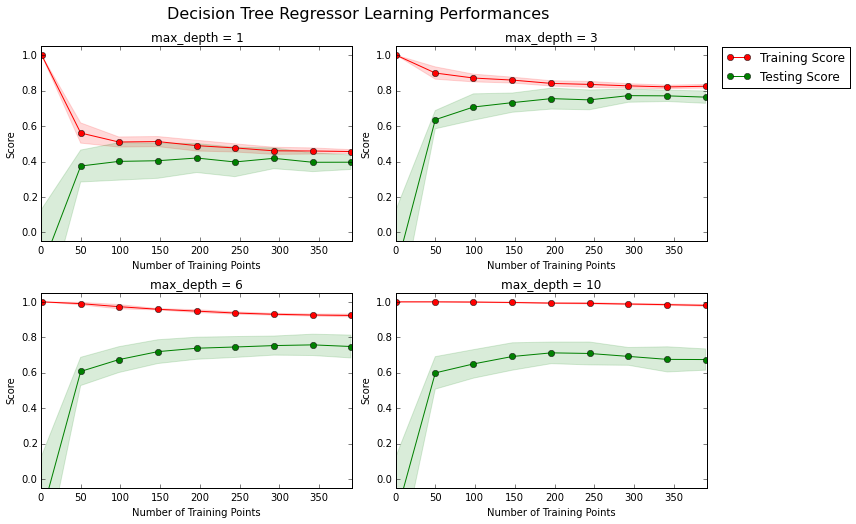

In [20]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Because the model is scored on both the training and testing sets using R2, the maximum depth for the model should be given by the graph where the training and testing scores are close to 1 and the gap between them is minimum.

In graph with max_depth = 1 we can see that R2 score for training set aprox. 0.5 and 0.4 for testing set. This implies that the model suffers from high bias. Increasing dataset examples will not help in this case.

Models who belong to graphs with max_depth = 6 and max_depth = 10 fit very well the training set (R2 very close to 1) but they fail to generalize (there is a significative gap between the training set and the testing set score). This models suffer from high variance. Increasing the dataset could help but is not possible in this case, so decreasing model's complexity could be a better choice. 

The best model is the one with max_depth = 3. Both training and testing scores are relatively close to 1 (I would like that both scores to be closer to 1) and the gap between them is minimum (doen't suffer from high variance, generalyze well). 

While more examples are in the training set, more complexity is needed to better fit the model. That's why R2 score decreases when the training set grows. On the other hand, if the training set is not enough (too few examples), the model fails to generalize. Because of this, when the training set size grows, it generalize better and the training set score grows too.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

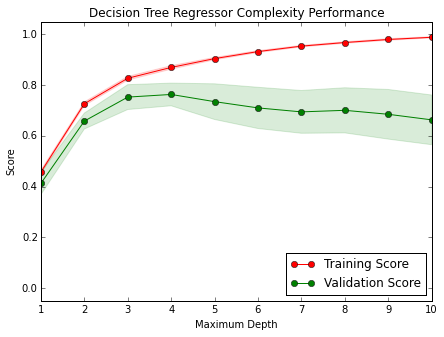

In [21]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When the model is trained with a maximum depth of 1, it suffer from high bias. From the graph we can see that the score for the training and testing set is very close to 0.4, which is a very poor performance. 

On the other hand, when the model is trained with maximum depth of 10, it suffers from high variance. score is excellent for training set (almost 1), which means that the model fits very well the training set. But if fails to generalize, that's way there is a significative gap between the training and testing score curves (the score for the testing set is close to 0.6, not very good).

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

The models that better generalize are those with max_depth 3 and 4, both performances (testing set score) are very close to 0.75. Model with max_depth=4 generalize better than the one with max_depth = 3 for just a little, but the last one could be considered too because has less complexity.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid Search is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

Using sklearn, basically these are the steps for appling grid search:
- Define a dictionary of the parameters and the possible values they may take, i.e: <br />
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} <br />
- Creat a classifier and search over specified parameter values for an estimator, i.e: <br />
    svr = svm.SVC() <br />
    clf = grid_search.GridSearchCV(svr, parameters) <br />
- Fit function to try all the parameter combinations, and get a fitted classifier that's automatically tuned to the optimal parameter combination, i.e: <br />
    clf.fit(iris.data, iris.target) <br />

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

K-Fold technique is about partitioning the dataset into K bins of equal size. Then, it must be run K separate learning experimients using a different bin as testing set in every iteration. The remaining bins in each iteration are used as training set. The last step consist in taking the average of the different testing set performances. 

In general, the assessment of the learning algorithm will be more accurate if using K-fold CV, but it takes more compute time. With this technique, all data available is used for training and for testing.

A model obtained using grid search without a CV set ensures that we are producing an optimized model but it could lead to suffering from high variance. The benefit that K-fold provide for grid searching when optimizing a model is that it ensures that the model will generalize well (if features and dataset examples are enough).



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [25]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [29]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
print "Model R2 Score: {}" .format(reg.score(X_test, y_test))
# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Model R2 Score: 0.843999557536
Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal model have an maximum depth of 4. This result matches my guess in question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [24]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $344,400.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

The predicted selling prices are the following:
- Predicted selling price for Client 1's home: 344,400.00  
- Predicted selling price for Client 2's home: 237,478.72  
- Predicted selling price for Client 3's home: 931,636.36

Considering the features collected for each house, the predicted prices looks to be reasonable:
- They all are between the minimum price and the maximum price.
- The client 3's home is expected to be the most expensive.
- The client 2's home is expected to be the cheapest. 
- The client 3's home is very big and it looks like it is in a rich neighorhood, so it is expected that it price be close to the maximum.

Something that I would expected was the client 1's home price to be closer to the mean price. I never visited Boston and I don't know how it was in the 70's, but based in the data collected, the client 1's home looks to be a mean house, at least is what I expected before running the predictor.

If I have to recommend my clients, I would recommend to use the predicted prices as a reference to define their houses price. Because the features are based on averages, the final price will depend on the hurry of the owner to sell, the general condition of the house, the materials with which it house was made, etc.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [26]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $103,732.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

I think that there are many factors that affect the housing price over time. Some examples of this factors are inflation (a correction have been done in this case), crises, economic events (i.e., if many businessmen move their companies from Boston to China will produce unemployment), natural disasters, etc. Therefore, with this dataset, the constructed model has a lot of probability to be unuseful for making predictions nowadays, I think that a inflation correction is not enough.

Besides they are important features, they are not enough to describe a home. I don't know how deep was the analysis than concluded with the exclution of the remaining features, but some of them sounds important, like crime rate for example. On the other hand, I don't really like that all features are means, ratios, percentages, medians. I would really like more a dataset where inputs be individual houses. I would like to have more features too, for example the neighborhood where it belongs, materials it is made of, land size where the house is, etc. In addition, the range in prices of $ 100k obteined above shows us that the model is not robust enough. 

Data collected in an urban city could not be applicable in a rural city. In general, houses with similar characteristics are much more expensive in urban cities than in rural cities. In fact, maybe even the features needed to predict housing prices must to be different in rural cities. On the other hand, I think that is very likely that data collected in one urban city could not be applicable for other urban city, at least with this parameters. For example job opportunities, climate, city history, demography, education, environment, healthcare, culture and other factors makes that housing prices vary in different urban cities.

In conclusion, the constructed model should not be used in a real-world setting nowadays.